## Real Estate Price Prediction - Regression

The real estate market plays a crucial role in the global economy, influencing everything from personal wealth to regional development. As urbanization continues to rise and housing demand fluctuates, accurately predicting real estate prices has become increasingly important for buyers, sellers, investors alike.

This project focuses on developing predictive models to estimate real estate prices based on various influential factors. 

The objectives of this project are as follows:
* Data Collection and Exploration: To gather and analyze a comprehensive dataset that includes historical real estate prices and relevant features. This exploration will help identify key trends and correlations within the data.
* Model Development: To build and evaluate various regression models, including linear regression, decision trees, and advanced machine learning techniques, to predict real estate prices accurately.
* Performance Evaluation: To assess the effectiveness of the models using metrics such as R² score, mean absolute error, and root mean squared error. This evaluation will ensure that the predictions are both reliable and actionable.

Through this project, we aim to enhance the understanding of the factors that drive real estate prices, ultimately assisting buyers and sellers in navigating the complexities of the housing market while contributing valuable knowledge to the field of real estate economics.

**Information About Data**
* Transaction Date: The specific date when the property transaction occurred.
* House Age: The number of years since the house was built.
* Distance to the Nearest MRT Station: The proximity (in meters or kilometers) to the closest Mass Rapid Transit station, which can influence property value.
* Number of Convenience Stores: The total count of convenience stores within a specified distance from the property, indicating accessibility to amenities.
* Latitude: The geographical latitude of the property's location, useful for mapping and spatial analysis.
* Longitude: The geographical longitude of the property's location, complementing latitude for precise location identification.
* House Price of Unit Area: The cost per unit area (e.g., per square meter) of the property, a critical metric for assessing property values.

<img src='real.jpg' width=550 >

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('Real_Estate.csv')
#Read the file.

### EDA - Exploratory Data Analysis

In [3]:
df.head()

,Transaction date,House age,Distance to the nearest MRT station,Number of convenience stores,Latitude,Longitude,House price of unit area
0,2012-09-02 16:42:30.519336,13.3,4082.0150,8,25.007059,121.561694,6.488673
1,2012-09-04 22:52:29.919544,35.5,274.0144,2,25.012148,121.546990,24.970725
2,2012-09-05 01:10:52.349449,1.1,1978.6710,10,25.003850,121.528336,26.694267
3,2012-09-05 13:26:01.189083,22.2,1055.0670,5,24.962887,121.482178,38.091638
4,2012-09-06 08:29:47.910523,8.5,967.4000,6,25.011037,121.479946,21.654710


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 7 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Transaction date                     414 non-null    object 
 1   House age                            414 non-null    float64
 2   Distance to the nearest MRT station  414 non-null    float64
 3   Number of convenience stores         414 non-null    int64  
 4   Latitude                             414 non-null    float64
 5   Longitude                            414 non-null    float64
 6   House price of unit area             414 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 22.8+ KB


In [5]:
df.shape

(414, 7)

In [6]:
df.isnull().sum()

Transaction date                       0
House age                              0
Distance to the nearest MRT station    0
Number of convenience stores           0
Latitude                               0
Longitude                              0
House price of unit area               0
dtype: int64

In [7]:
df.describe()

,House age,Distance to the nearest MRT station,Number of convenience stores,Latitude,Longitude,House price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,18.405072,1064.468233,4.265700,24.973605,121.520268,29.102149
std,11.757670,1196.749385,2.880498,0.024178,0.026989,15.750935
min,0.000000,23.382840,0.000000,24.932075,121.473888,0.000000
25%,9.900000,289.324800,2.000000,24.952422,121.496866,18.422493
50%,16.450000,506.114400,5.000000,24.974353,121.520912,30.394070
75%,30.375000,1454.279000,6.750000,24.994947,121.544676,40.615184
max,42.700000,6306.153000,10.000000,25.014578,121.565321,65.571716


In [8]:
df['Transaction date']=pd.to_datetime(df['Transaction date'])

In [9]:
df['Day']=df['Transaction date'].dt.day
df['Month']=df['Transaction date'].dt.month
df['Year']=df['Transaction date'].dt.year

In [10]:
df['House Built Date']=datetime.datetime.now().year-df['House age'].astype(int)

In [11]:
df.head()

,Transaction date,House age,Distance to the nearest MRT station,Number of convenience stores,Latitude,Longitude,House price of unit area,Day,Month,Year,House Built Date
0,2012-09-02 16:42:30.519336,13.3,4082.0150,8,25.007059,121.561694,6.488673,2,9,2012,2011
1,2012-09-04 22:52:29.919544,35.5,274.0144,2,25.012148,121.546990,24.970725,4,9,2012,1989
2,2012-09-05 01:10:52.349449,1.1,1978.6710,10,25.003850,121.528336,26.694267,5,9,2012,2023
3,2012-09-05 13:26:01.189083,22.2,1055.0670,5,24.962887,121.482178,38.091638,5,9,2012,2002
4,2012-09-06 08:29:47.910523,8.5,967.4000,6,25.011037,121.479946,21.654710,6,9,2012,2016


In [12]:
df.corr(numeric_only=True)

,House age,Distance to the nearest MRT station,Number of convenience stores,Latitude,Longitude,House price of unit area,Day,Month,Year,House Built Date
House age,1.000000,0.021596,0.021973,0.114345,0.036449,-0.012284,0.053499,0.018921,-0.025535,-0.999673
Distance to the nearest MRT station,0.021596,1.000000,0.069015,0.038954,0.064229,-0.636579,-0.018963,0.027954,-0.017002,-0.020888
Number of convenience stores,0.021973,0.069015,1.000000,0.082725,0.013156,0.280763,-0.059019,0.081461,-0.096270,-0.021876
Latitude,0.114345,0.038954,0.082725,1.000000,0.007754,0.081008,0.003856,-0.050891,0.024791,-0.112807
Longitude,0.036449,0.064229,0.013156,0.007754,1.000000,-0.098626,-0.006847,-0.057595,0.086737,-0.036990
House price of unit area,-0.012284,-0.636579,0.280763,0.081008,-0.098626,1.000000,-0.008659,-0.041256,0.015745,0.013220
Day,0.053499,-0.018963,-0.059019,0.003856,-0.006847,-0.008659,1.000000,-0.040467,0.049139,-0.051605
Month,0.018921,0.027954,0.081461,-0.050891,-0.057595,-0.041256,-0.040467,1.000000,-0.873938,-0.021267
Year,-0.025535,-0.017002,-0.096270,0.024791,0.086737,0.015745,0.049139,-0.873938,1.000000,0.027516
House Built Date,-0.999673,-0.020888,-0.021876,-0.112807,-0.036990,0.013220,-0.051605,-0.021267,0.027516,1.000000


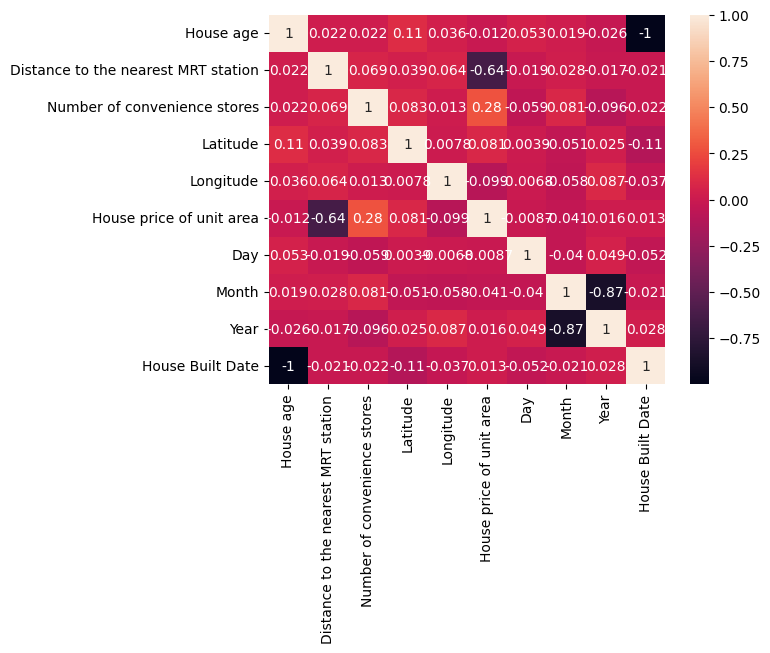

In [13]:
sns.heatmap(df.corr(numeric_only=True), annot=True);

### Data Visualization

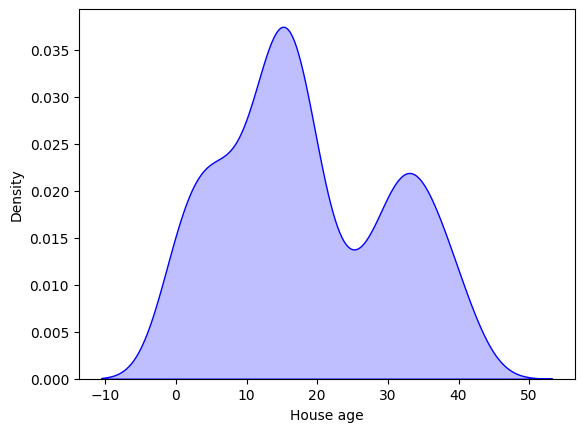

In [14]:
sns.kdeplot(x=df['House age'], fill=True, color='blue');

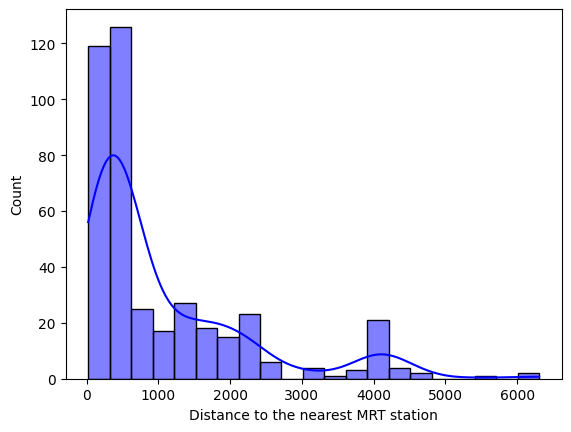

In [15]:
sns.histplot(x=df['Distance to the nearest MRT station'], kde=True, color='blue');

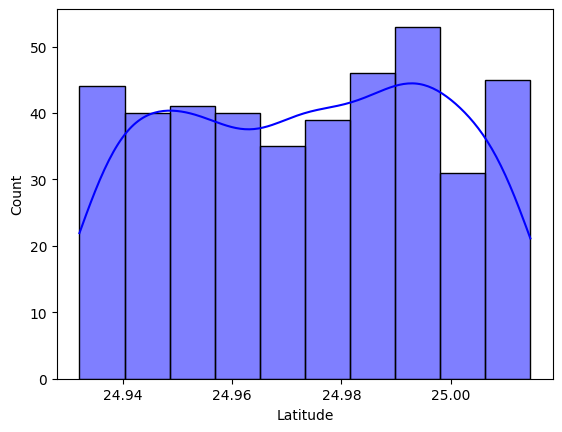

In [16]:
sns.histplot(x=df['Latitude'],kde=True, color='blue');

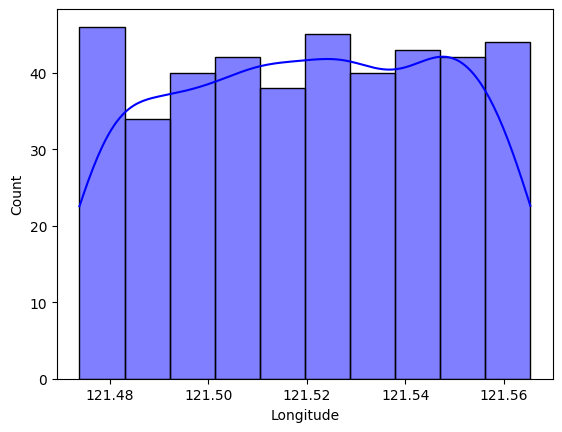

In [17]:
sns.histplot(x=df['Longitude'],kde=True, color='blue');

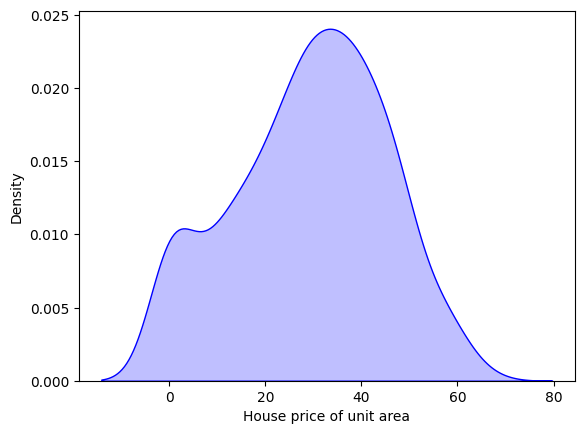

In [18]:
sns.kdeplot(x=df['House price of unit area'],fill=True, color='blue');

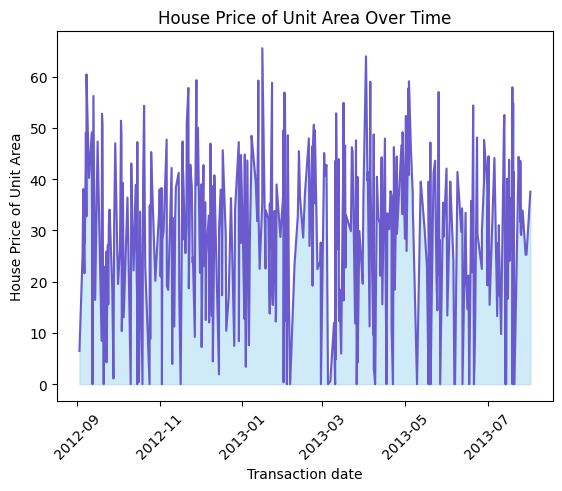

In [19]:
plt.fill_between(df['Transaction date'], df['House price of unit area'], color="skyblue",alpha=0.4)
plt.plot(df['Transaction date'], df['House price of unit area'], color="Slateblue")
plt.title('House Price of Unit Area Over Time')
plt.xlabel('Transaction date')
plt.ylabel('House Price of Unit Area')
plt.xticks(rotation=45);

### Modelling

In [20]:
df.drop('Transaction date', axis=1 ,inplace=True)

In [21]:
x=df.drop('House price of unit area', axis=1)
y=df[['House price of unit area']]

In [22]:
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.20, random_state=42)

In [23]:
lr=LinearRegression()
model=lr.fit(x_train, y_train)
pred=lr.predict(x_test)
rmse=mean_squared_error(y_test, pred)**.5
r2=r2_score(y_test, pred)

print('Root Mean Squared Error:', rmse)
print('R2 Score:', r2)

Root Mean Squared Error: 11.369389583433223
R2 Score: 0.5327427768283117


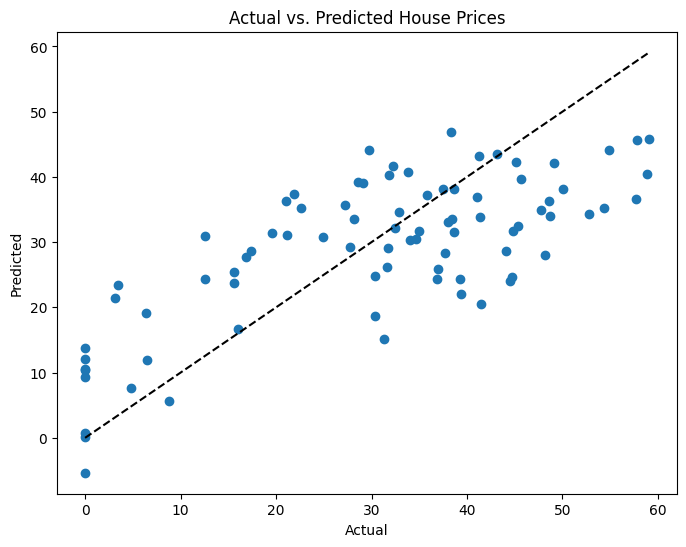

In [24]:
y_pred=model.predict(x_test)

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted House Prices')
plt.show()

## Feature Importance

In [25]:
feature_importance=pd.DataFrame({'Feature':x_train.columns, 'Coefs':lr.coef_[0]})

In [26]:
feature_importance=feature_importance.sort_values(by='Coefs', ascending=False)

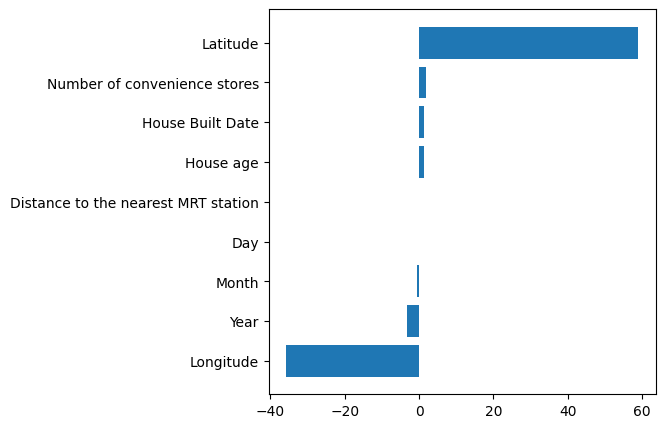

In [27]:
plt.figure(figsize=(5,5))
plt.barh(feature_importance['Feature'],feature_importance['Coefs'])
plt.gca().invert_yaxis()

In [28]:
residuals=y_test-pred

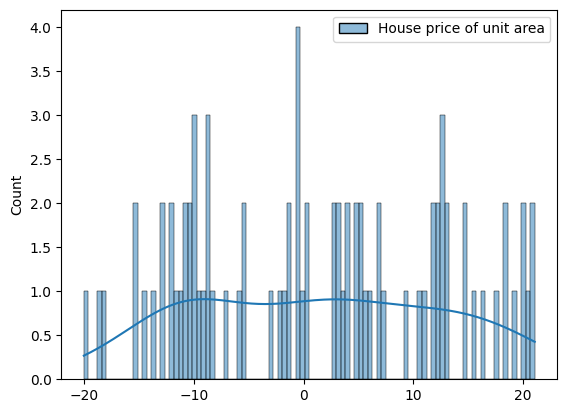

In [29]:
sns.histplot(residuals, kde=True,bins=100);

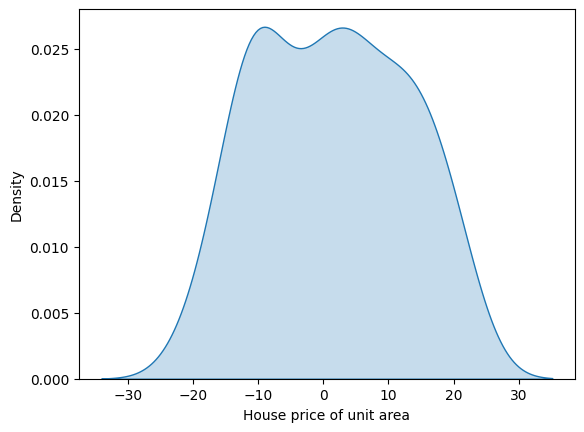

In [30]:
sns.kdeplot(x=residuals['House price of unit area'], fill=True);

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",100)

from sklearn.linear_model import LinearRegression,SGDRegressor,Ridge,Lasso,ElasticNet
from sklearn.neighbors import KNeighborsRegressor, RadiusNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor,AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor, plot_tree, ExtraTreeRegressor
#pip install xgboost
from xgboost import XGBRegressor
from sklearn.svm import SVR

from sklearn.neural_network import MLPRegressor

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

from sklearn.preprocessing import StandardScaler


def algo_test(x,y):
        L=LinearRegression()
        R=Ridge()
        Lass=Lasso()
        E=ElasticNet()
        sgd=SGDRegressor()
        ETR=ExtraTreeRegressor()
        GBR=GradientBoostingRegressor()
        kn=KNeighborsRegressor()
        rkn=RadiusNeighborsRegressor(radius=1.0)
        ada=AdaBoostRegressor()
        dt=DecisionTreeRegressor()
        xgb=XGBRegressor()
        svr=SVR()
        mlp_regressor = MLPRegressor()

       
        
        algos=[L,R,Lass,E,sgd,ETR,GBR,ada,kn,dt,xgb,svr,mlp_regressor]
        algo_names=['Linear','Ridge','Lasso','ElasticNet','SGD','Extra Tree','Gradient Boosting',
                    'KNeighborsRegressor','AdaBoost','Decision Tree','XGBRegressor','SVR','mlp_regressor']
        
        x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=.20,random_state=42)
        
        r_squared= []
        rmse= []
        mae= []
        
        
        result=pd.DataFrame(columns=['R_Squared','RMSE','MAE'],index=algo_names)
        
        
        for algo in algos:
            p=algo.fit(x_train,y_train).predict(x_test)
            r_squared.append(r2_score(y_test,p))
            rmse.append(mean_squared_error(y_test,p)**.5)
            mae.append(mean_absolute_error(y_test,p))
        

        result.R_Squared=r_squared
        result.RMSE=rmse
        result.MAE=mae
        
       
        rtable=result.sort_values('R_Squared',ascending=False)
        return rtable

In [32]:
algo_test(x,y)

,R_Squared,RMSE,MAE
Lasso,5.484891e-01,1.117618e+01,9.838506e+00
ElasticNet,5.471187e-01,1.119312e+01,9.850801e+00
Ridge,5.346028e-01,1.134674e+01,9.884314e+00
Linear,5.327428e-01,1.136939e+01,9.725683e+00
Gradient Boosting,4.877886e-01,1.190375e+01,9.995935e+00
KNeighborsRegressor,4.872654e-01,1.190983e+01,1.031495e+01
mlp_regressor,4.716098e-01,1.209028e+01,1.031439e+01
AdaBoost,4.640250e-01,1.217675e+01,9.661798e+00
SVR,4.512853e-01,1.232062e+01,1.020960e+01
XGBRegressor,4.312672e-01,1.254334e+01,1.056115e+01


## Regression AutoML with PyCaret

In [33]:
#pip install pycaret

In [34]:
from pycaret.regression import*

In [35]:
setup(data=df, target='House price of unit area')

,Description,Value
0,Session id,8521
1,Target,House price of unit area
2,Target type,Regression
3,Original data shape,"(414, 10)"
4,Transformed data shape,"(414, 10)"
5,Transformed train set shape,"(289, 10)"
6,Transformed test set shape,"(125, 10)"
7,Numeric features,9
8,Preprocess,True
9,Imputation type,simple


In [36]:
best_model=compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lasso,Lasso Regression,9.5872,126.9712,11.1897,0.4719,0.7661,0.9003,0.6520
llar,Lasso Least Angle Regression,9.5872,126.9711,11.1897,0.4719,0.7661,0.9003,0.0120
en,Elastic Net,9.5857,127.1141,11.1956,0.4714,0.7640,0.8998,0.0110
br,Bayesian Ridge,9.5962,127.4561,11.2111,0.4699,0.7629,0.9021,0.0120
ridge,Ridge Regression,9.6594,128.2482,11.2572,0.4643,0.7585,0.9278,0.0110
lr,Linear Regression,9.7404,130.5876,11.3543,0.4545,0.7593,0.8983,0.5370
huber,Huber Regressor,9.8674,137.6768,11.6431,0.4252,0.7969,0.9338,0.0170
ada,AdaBoost Regressor,10.1971,137.2319,11.6302,0.4239,0.8434,0.9246,0.0280
et,Extra Trees Regressor,10.0484,145.7755,12.0005,0.3885,0.7616,0.8955,0.0430
omp,Orthogonal Matching Pursuit,10.1716,151.4703,12.1842,0.3778,0.7789,0.8766,0.0110


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

## Deep Learning

In [37]:
import tensorflow as tf

In [38]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [39]:
model=Sequential()
model.add(Dense(120,activation='relu'))  
model.add(Dense(80,activation='relu')) 
model.add(Dense(64,activation='relu')) 
model.add(Dense(30,activation='relu'))
model.add(Dense(20,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(1))
model.compile(loss='mse', optimizer='adam')

In [49]:
history=model.fit(x,y,epochs=3500, batch_size=25, validation_split=.20,verbose=0)

In [50]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 120)                 │           1,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 80)                  │           9,680 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │           5,184 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 30)                  │           1,950 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 20)                  │             620 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 4)                   │              84 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 1)                   │               5 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 56,171 (219.42 KB)

 Trainable params: 18,723 (73.14 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 37,448 (146.29 KB)

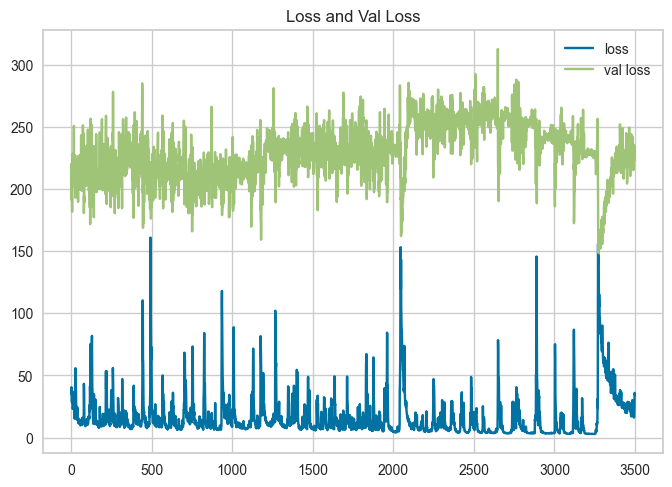

In [51]:
plt.plot(history.history['loss'],label='loss') 
plt.plot(history.history['val_loss'],label='val loss')
plt.title('Loss and Val Loss')
plt.legend();

In [52]:
tahmin=model.predict(x_test)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


In [53]:
r2_score(y_test,tahmin)

0.6886987038251366

In [54]:
mean_squared_error(y_test,tahmin)**.5

9.280034716216402

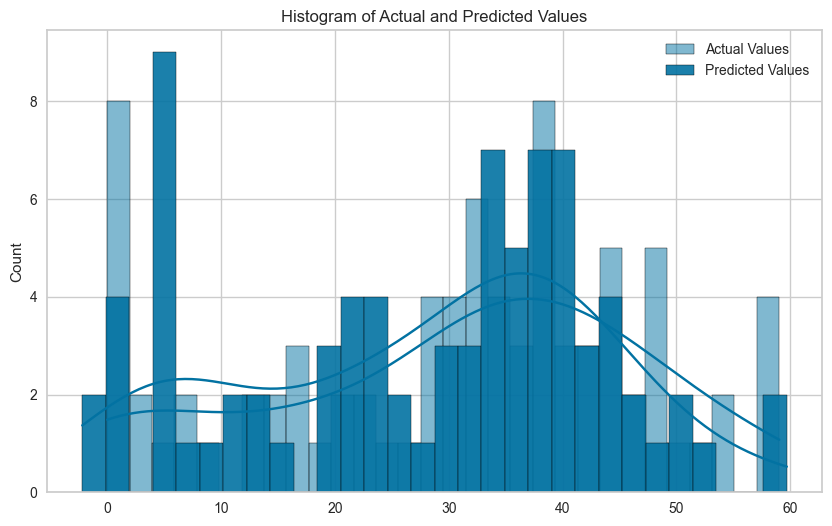

In [55]:
plt.figure(figsize=(10, 6))
sns.histplot(y_test, kde=True,label='Actual Values', alpha=0.5, bins=30)
sns.histplot(tahmin, kde=True,label='Predicted Values', alpha=0.9, bins=30)
plt.title('Histogram of Actual and Predicted Values')
plt.legend();

###  Summary

This project focuses on predicting real estate prices using various influential factors such as transaction date, house age, distance to the nearest MRT station, number of markets, latitude and longitude. The aim is to develop robust prediction models that accurately predict housing prices and help stakeholders make informed decisions in the real estate market. After reviewing and organizing our data, we moved on to training our model. Lasso gave the highest result with 54 percent. The best result in Pycarette was Lasso with 47 percent. Since our success rate was low, we also applied deep learning. We managed to reach a success rate of 68 percent with deep learning. We have completed our project.